In [2]:
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.datasets import load_boston
from sklearn.preprocessing import FunctionTransformer
from feature_engine.transformation import LogTransformer

In [3]:
boston_dataset = load_boston()
data = pd.DataFrame(boston_dataset.data,
columns=boston_dataset.feature_names)

In [4]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

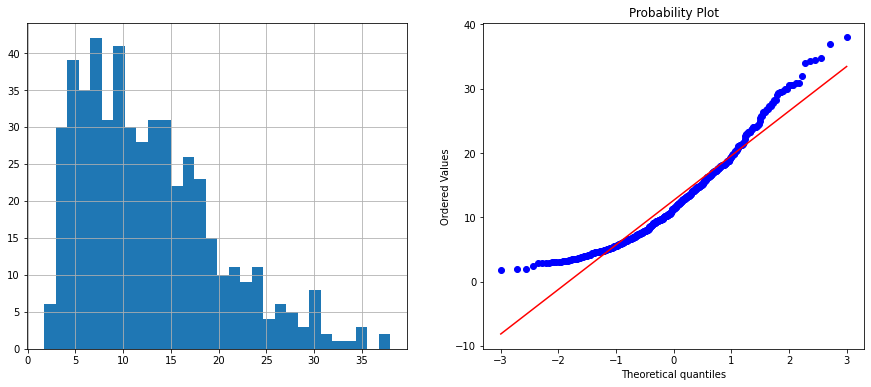

In [5]:
diagnostic_plots(data, 'LSTAT')

In [6]:
data_tf = data.copy()

In [7]:
data_tf[['LSTAT', 'NOX', 'DIS', 'RM']] = np.log(data[['LSTAT',
'NOX', 'DIS', 'RM']])

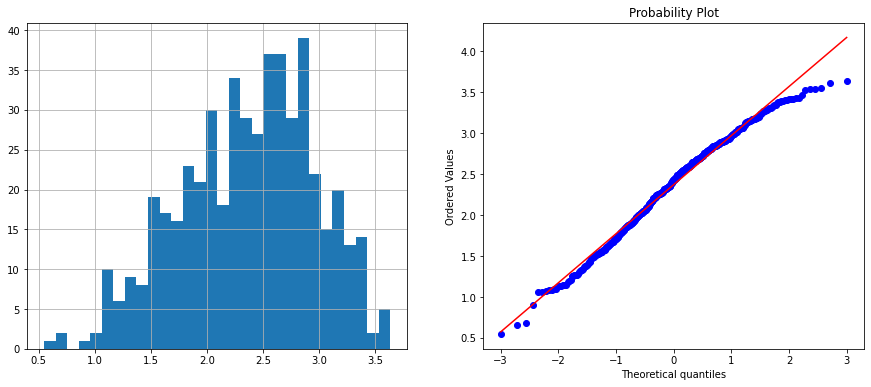

In [8]:
diagnostic_plots(data_tf, 'LSTAT')

In [9]:
# sklearn transformer
transformer = FunctionTransformer(np.log)

In [10]:
data_tf = transformer.transform(data[['LSTAT', 'NOX', 'DIS',
'RM']])

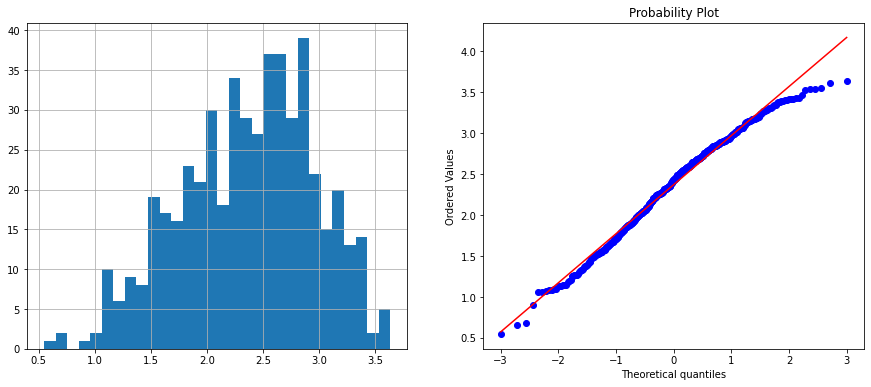

In [11]:
diagnostic_plots(data_tf, 'LSTAT')